In [1]:
# FINANCIAL LITERACY SCORE

# The Financial Literacy Score is a tool developed by the OECD and allows to measure the financial literacy level of a person.
# The maximum score is 21 (a combination of a maximum of 7 for knowledge, 9 for behaviour and 5 for attitudes).

# OBJECTIVE
# This Score could provide information beyond traditional financial measures.These are some questions that we want to answer
#
# Can someone with lower income have higher financial score than someone with higher income?
# Is true that for a given score, some individuals have faced or are facing material hardships or difficulty making ends meet?
# Are demographic characteristics associated with financial literacy?

# The Bancolombia Bank measured the Score of more than 1.300 vulnerable people, many of them don´t have a credit history. 
# This Score will allow a better understanding of the financial habits of this population and thus offer financial products.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#! pip install matplotlib

In [4]:
# Read the Dataset of Financial Literacy 
financial_df = pd.read_excel('/content/drive/MyDrive/Financial Literacy OCDE/Dataset OCED Financial Literacy.xlsx', index_col='Id')

In [5]:
# Let´s explore the data
print('Shape of DataFrame: ',financial_df.shape)
print('VARIABLES INFO')
financial_df.info()

Shape of DataFrame:  (1362, 77)
VARIABLES INFO
<class 'pandas.core.frame.DataFrame'>
Float64Index: 1362 entries, 1.0 to 1368.0
Data columns (total 77 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Gender (QD1)                                                                                         1362 non-null   object 
 1   Age (QD7)                                                                                            1362 non-null   float64
 2   Education (QD9)                                                                                      1362 non-null   object 
 3   Ethnicity (QD8)                                                                                      1362 non-null   object 
 4   Colombian (QD12)                                       

In [6]:
# DEALING WITH MISSING DATA

In [7]:
# There are 119 null values for 'Work Situation (QD10)' and 'Income band (QD13)' columns
# We found some missing values for One-Person Household 
one_person_household_df = financial_df[financial_df['Household Composition [One-Person] (QD5)']=='Sí']
print('MISSING VALUES FOR ONE-PERSON HOUSEHOLD')
print('Missing values for Work Situación column: ', one_person_household_df['Work Situation (QD10)'].isnull().sum())
print('Missing values for Income Data column: ', one_person_household_df['Income band (QD13)'].isnull().sum())

MISSING VALUES FOR ONE-PERSON HOUSEHOLD
Missing values for Work Situación column:  119
Missing values for Income Data column:  119


In [8]:
# Let´s going to replace missing data with the most repeated value
work_mode=financial_df[financial_df['Household Composition [One-Person] (QD5)']=='No']['Work Situation (QD10)'].mode()[0]
income_mode= financial_df[financial_df['Household Composition [One-Person] (QD5)']=='No']['Income band (QD13)'].mode()[0]
# replace nan
financial_df['Work Situation (QD10)'].fillna(work_mode, inplace=True)
financial_df['Income band (QD13)'].fillna(income_mode, inplace=True)

In [9]:
# OUTLIERS 
round(financial_df[['Age (QD7)', 'Household Composition [Qty Adults] (QD5_ad)', 'Household Composition [Qty Minors] (QD5_ch)']].describe(),2)

,Age (QD7),Household Composition [Qty Adults] (QD5_ad),Household Composition [Qty Minors] (QD5_ch)
count,1362.00,1362.00,1362.00
mean,14808.51,2.66,0.93
std,545231.93,2.02,1.31
min,11.00,0.00,0.00
25%,23.00,2.00,0.00
50%,31.00,2.00,0.00
75%,41.75,3.00,2.00
max,20121974.00,48.00,16.00


In [10]:
# There are some outliers for 'Age (QD7)'. Let´s keep values between 15 and 100 years
# Drop samples with a Quantity of Mnors ansd Adults more than 20
financial_df = financial_df.drop(financial_df[financial_df['Age (QD7)']<15].index, axis=0)
financial_df = financial_df.drop(financial_df[financial_df['Age (QD7)']>100].index, axis=0)
financial_df = financial_df.drop(financial_df[financial_df['Household Composition [Qty Adults] (QD5_ad)']>20].index, axis=0)
financial_df = financial_df.drop(financial_df[financial_df['Household Composition [Qty Minors] (QD5_ch)']>20].index, axis=0)

In [11]:
# CORRELATION MATRIX
# A heatmap of correlation matrix is a good way to get a quick overview of relationships between variables.
# At the begining the whole variables are shown in the correlation matrix (heatmap).
# Then, a Financial Literacy Score heatmap with the most important variables was displayed.

In [12]:
# Let´s subset the dataframe with Demographic variables
demog_list = ['Gender (QD1)', 'Age (QD7)', 'Education (QD9)', 'Ethnicity (QD8)', 'Colombian (QD12)', 'City Size (QD3)',
              'Household Composition [One-Person] (QD5)', 'Household Composition [With Partner] (QD5)', 
              'Household Composition [Children Over 18] (QD5)', 'Household Composition [With Parent] (QD5)',
              'Household Composition [Other Relatives] (QD5)', 'Household Composition [With Friends] (QD5)',
              'Household Composition [Other Adults] (QD5)', 'Household Composition [Qty Adults] (QD5_ad)',
              'Household Composition [Children Under 18] (QD5)', 'Household Composition [Qty Minors] (QD5_ch)',
              'Work Situation (QD10)','Income band (QD13)', 'Financial Well-Being (CFPB)', 'Financial Literacy Score']
demog_df = financial_df[demog_list]

In [13]:
# change all categorical variables to numbers
demog_to_num ={
        'Gender (QD1)':                                   {'Hombre': 1, 'Mujer': 2, 'Otro': 3},
        'Education (QD9)':                                {'Posgrado o equivalente (Maestría, Doctorado, Especialización, etc.)': 1, 'Universitario': 2, 'Técnico / Tecnólogo': 3, 'Secundaria / Bachiller completo': 4, 'Secundaria / Bachiller incompleto': 5, 'Primaria completa': 6, 'Primaria incompleta': 7, 'No tengo ninguna educación formal': 8},
        'Ethnicity (QD8)':                                {'Indígena': 1, 'Raizal': 2, 'Afrodescendiente': 3, 'Palenquero': 4, 'Gitano': 5, 'Ninguna de las anteriores': 6},
        'Colombian (QD12)':                               {'Sí': 1, 'No': 2},
        'City Size (QD3)':                                {'Una Aldea, Vereda o Área Rural (menos de 3.000 personas)': 1, 'Un Pueblo (entre 3.000 y 15.000 personas)': 2, 'Un Municipio (entre 15.000 y 100.000 personas)': 3, 'Una Ciudad (entre 100.000 personas y 1.000.000 de personas)': 4, 'Una Gran Ciudad (más de 1.000.000 de personas)': 5, 'No sé': 6},
        'Household Composition [One-Person] (QD5)':       {'Sí': 1, 'No': 2},
        'Household Composition [With Partner] (QD5)':     {'Sí': 1, 'No': 2},
        'Household Composition [Children Over 18] (QD5)': {'Sí': 1, 'No': 2},
        'Household Composition [With Parent] (QD5)':      {'Sí': 1, 'No': 2},
        'Household Composition [Other Relatives] (QD5)':  {'Sí': 1, 'No': 2},
        'Household Composition [With Friends] (QD5)':     {'Sí': 1, 'No': 2},
        'Household Composition [Other Adults] (QD5)':     {'Sí': 1, 'No': 2},
        'Household Composition [Children Under 18] (QD5)':{'Sí': 1, 'No': 2, 0: 2}, # zero for one-person households
        'Work Situation (QD10)':                          {'Empleado(a) Independiente': 1, 'Empleado(a) / Trabajo para una empresa': 2, 'Principiante / Aprendiz en una empresa': 3, 'Encargado(a) del cuidado de la casa': 4, 'Desempleado(a) y buscando empleo': 5, 'Jubilado(a) / Pensionado(a)': 6, 'Incapacitado(a) para trabajar': 7, 'Estudiante': 8, 'Desempleado(a) y no me interesa buscar trabajo': 9, 'Otra': 10},
        'Income band (QD13)':                             {'Más de 3.000.000 de pesos': 1, 'Entre 2.000.000 y 3.000.000 de pesos': 2, 'Entre 1.000.000 y 2.000.000 de pesos': 3, 'Entre 500.000 y 1.000.000 de pesos': 4, 'Menos de 500.000 pesos': 5}
}
demog_df = demog_df.replace(demog_to_num)

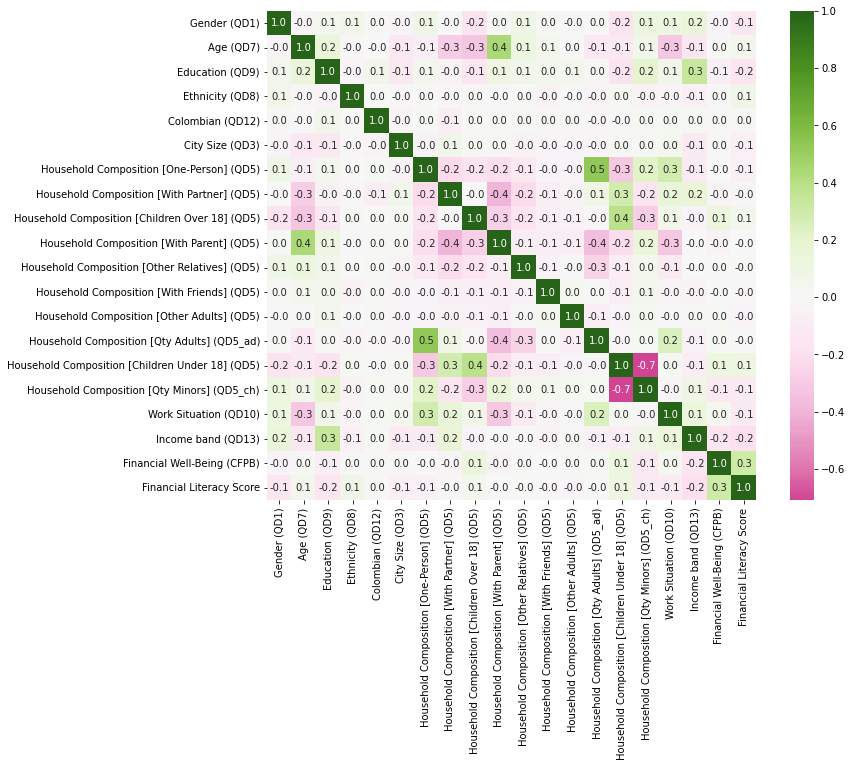

In [14]:
corrmat = demog_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True, fmt='.1f', center=0, linecolor='black', cmap="PiYG")
# No significant linear relationships were found between the demographic variables and the Financial Score

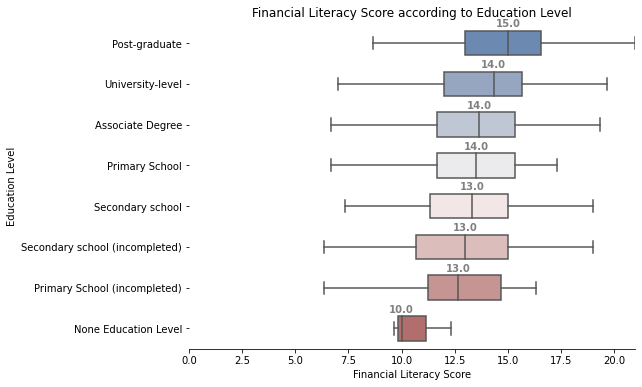

In [15]:
# VISUALIZATION OF SOME VARIABLES
# Boxplots will be used to visualize the relationships with the Financial Score

# EDUCATION LEVEL
# Subsetting the dataset
data = financial_df[["Financial Literacy Score",'Education (QD9)']]
# Show names in English
eng_names={
        'Education (QD9)': {'Posgrado o equivalente (Maestría, Doctorado, Especialización, etc.)': 'Post-graduate',
                            'Universitario': 'University-level',
                            'Técnico / Tecnólogo': 'Associate Degree',
                            'Secundaria / Bachiller completo': 'Secondary school',
                            'Secundaria / Bachiller incompleto': 'Secondary school (incompleted)',
                            'Primaria completa': 'Primary School',
                            'Primaria incompleta': 'Primary School (incompleted)',
                            'No tengo ninguna educación formal': 'None Education Level'}
}
data = data.replace(eng_names)

#calculate medians for the boxplot
medians = data.groupby(['Education (QD9)'])['Financial Literacy Score'].median().sort_values(ascending=False)
median_labels = [str(np.round(s)) for s in medians]
order = medians.index.tolist()

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="Financial Literacy Score", y="Education (QD9)", data=data, width=.6, palette="vlag", order=order, showfliers = False)
ax.set(xlim=(0, 21))
sns.despine(trim=False, left=True)
ax.set_title('Financial Literacy Score according to Education Level')
ax.set_ylabel('Education Level')
ax.set_xlabel('Financial Literacy Score')

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(y=pos[tick]-0.4, x=medians[tick], s=median_labels[tick], 
            horizontalalignment='center', size='medium', color='grey', weight='semibold')

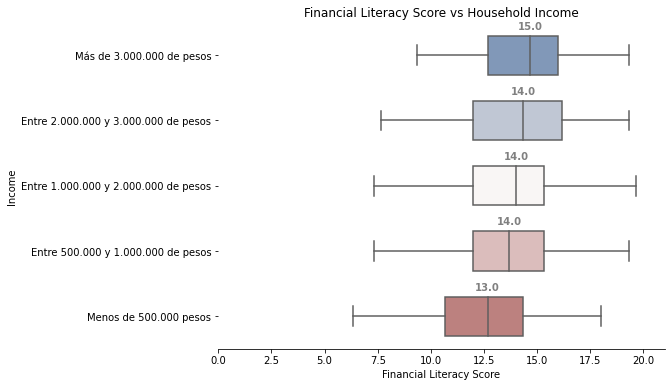

In [16]:
# INCOME BAND
# Subsetting the dataset
data = financial_df[["Financial Literacy Score",'Income band (QD13)']]
# Show names in English

#calculate medians for the boxplot
medians = data.groupby(['Income band (QD13)'])['Financial Literacy Score'].median().sort_values(ascending=False)
median_labels = [str(np.round(s)) for s in medians]
order = medians.index.tolist()

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="Financial Literacy Score", y="Income band (QD13)", data=data, width=.6, palette="vlag", order=order, showfliers = False)
ax.set(xlim=(0, 21))
sns.despine(trim=False, left=True)
ax.set_title('Financial Literacy Score vs Household Income')
ax.set_ylabel('Income')
ax.set_xlabel('Financial Literacy Score')

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(y=pos[tick]-0.4, x=medians[tick], s=median_labels[tick], 
            horizontalalignment='center', size='medium', color='grey', weight='semibold')

In [17]:
saving_list = ['Active Saving [Saving cash at home or in your wallet] (QF3)', 'Active Saving [Paying money into a bank account ] (QF3)',
            'Active Saving [Giving money to family to save on your behalf] (QF3)',
            'Active Saving [Saving in an informal savings club] (QF3)',
            'Active Saving [Buying bonds or time deposits] (QF3)',
            'Active Saving [Investing in crypto-assets or ICOs] (QF3)',
            'Active Saving [Saving or investing in some other way, other than a pension] (QF3)',
            'Active Saving [No active saver] (QF3)']

In [18]:
def reshape_df(list, df, label='Active Saving', target='Financial Literacy Score'):
  """
  This function takes n variables from a DataFrame and converts them to a DataFrame with two columns.
  Parameters
  
  list: (list) variables to be merged into 1 column
  df: Dataframe with the data
  target: target variable (default: 'Financial Literacy Score')

  returns a Dataframe with 2 columns
  """
  # empty DataFrame
  col_names = [label, target]
  reshaped_df = pd.DataFrame(columns = col_names)
  # iterate over a list
  for i in list:
    cond = df[i]=='Sí'
    temp_df = df[cond][[i, target]]
    temp_df[i] = i.split("[")[1].split(']')[0]
    temp_df.rename(columns={i: label, target: target}, inplace= True)
    # concat dataframes
    reshaped_df = pd.concat([reshaped_df, temp_df], ignore_index=True)
  return reshaped_df
# Data for the active saving users
saving_df = reshape_df(saving_list, financial_df)

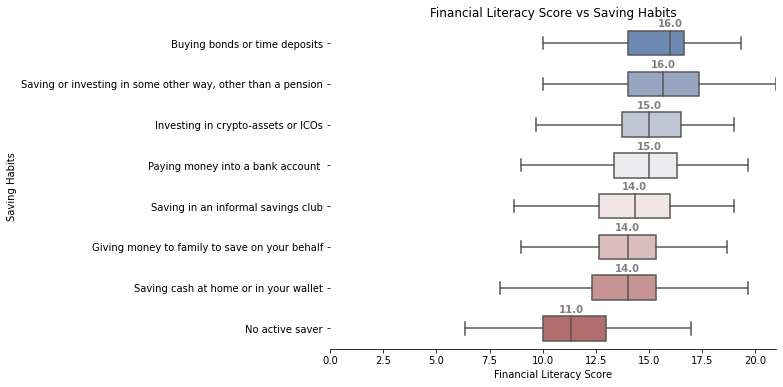

In [19]:
# SAVING HABITS
# Subsetting the dataset
data = saving_df

#calculate medians for the boxplot
medians = data.groupby(['Active Saving'])['Financial Literacy Score'].median().sort_values(ascending=False)
median_labels = [str(np.round(s)) for s in medians]
order = medians.index.tolist()

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="Financial Literacy Score", y='Active Saving', data=data, width=.6, palette="vlag", order=order, showfliers = False)
ax.set(xlim=(0, 21))
sns.despine(trim=False, left=True)
ax.set_title('Financial Literacy Score vs Saving Habits')
ax.set_ylabel('Saving Habits')
ax.set_xlabel('Financial Literacy Score')

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(y=pos[tick]-0.4, x=medians[tick], s=median_labels[tick], 
            horizontalalignment='center', size='medium', color='grey', weight='semibold')

In [20]:
budget_list=['Household Budget [Make a plan to manage your income and expenses] (QF2)',
       'Household Budget [Keep a note of your spending] (QF2)',
       'Household Budget [Keep money for bills separate from day-to-day spending money] (QF2)',
       'Household Budget [Make a note of upcoming bills to make sure you do not miss them] (QF2)',
       'Household Budget [Use a banking app or money management tool to keep track of your outgoings] (QF2)',
       'Household Budget [Arrange automatic payments for regular outgoings] (QF2)',
       'Household Budget [No activity] (QF2)']

In [21]:
# Data for the household budget
budget_df = reshape_df(budget_list, financial_df, label='Household Budget')

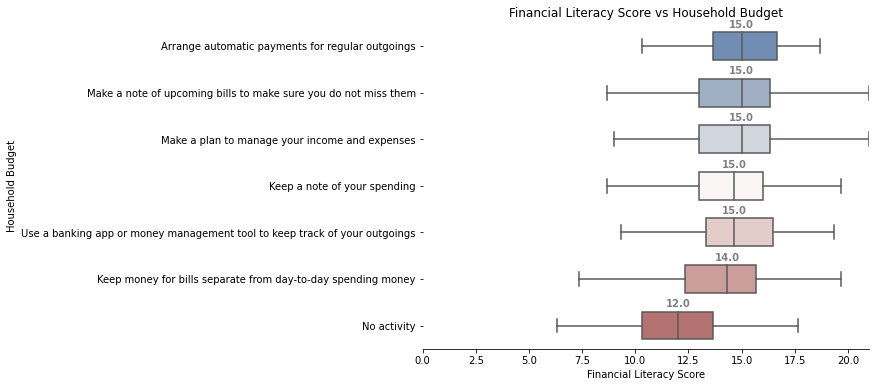

In [22]:
# BUDGET
# Subsetting the dataset
data = budget_df

#calculate medians for the boxplot
medians = data.groupby(['Household Budget'])['Financial Literacy Score'].median().sort_values(ascending=False)
median_labels = [str(np.round(s)) for s in medians]
order = medians.index.tolist()

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="Financial Literacy Score", y='Household Budget', data=data, width=.6, palette="vlag", order=order, showfliers = False)
ax.set(xlim=(0, 21))
sns.despine(trim=False, left=True)
ax.set_title('Financial Literacy Score vs Household Budget')
ax.set_ylabel('Household Budget')
ax.set_xlabel('Financial Literacy Score')

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(y=pos[tick]-0.4, x=medians[tick], s=median_labels[tick], 
            horizontalalignment='center', size='medium', color='grey', weight='semibold')

In [23]:
make_ends_list = ['How to make ends meet [Draw money out of savings] (QF12)',
       'How to make ends meet [Cut back on spending] (QF12)',
       'How to make ends meet [Sell something that you own] (QF12)',
       'How to make ends meet [Work overtime, Earn extra money] (QF12)',
       'How to make ends meet [Claim support from the government] (QF12)',
       'How to make ends meet [Borrow from family, friends] (QF12)',
       'How to make ends meet [Pawn something that you own] (QF12)',
       'How to make ends meet [Take a loan from your savings and loans clubs] (QF12)',
       'How to make ends meet [Use credit card for a cash advance or to pay bills] (QF12)',
       'How to make ends meet [Take out a personal loan from a bank] (QF12)',
       'How to make ends meet [Take out a payday loan] (QF12)',
       'How to make ends meet [Pay bills late; miss payments] (QF12)']

make_ends_df = reshape_df(make_ends_list, financial_df, label='How to make ends meet')

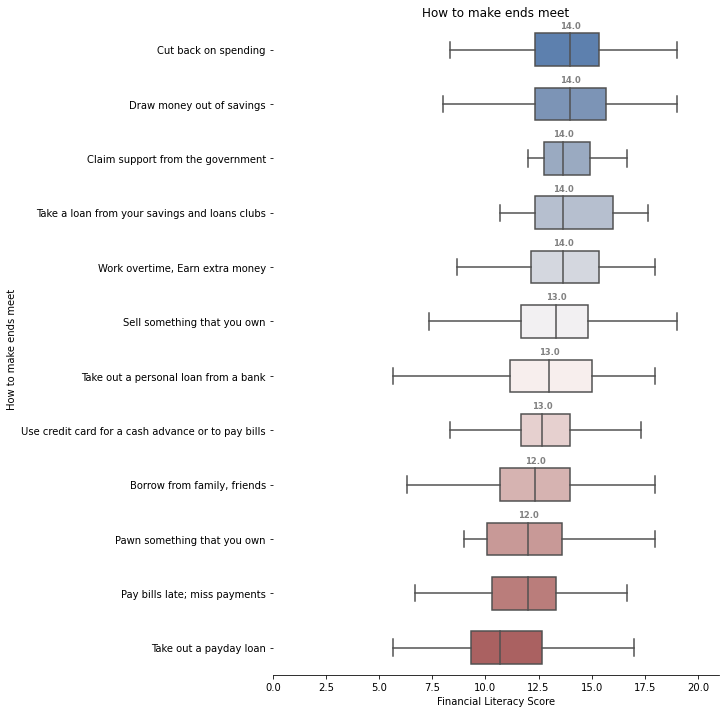

In [24]:
# HOW TO MAKE ENDS MEET
# Subsetting the dataset
data = make_ends_df

#calculate medians for the boxplot
medians = data.groupby(['How to make ends meet'])['Financial Literacy Score'].median().sort_values(ascending=False)
median_labels = [str(np.round(s)) for s in medians]
order = medians.index.tolist()

f, ax = plt.subplots(figsize=(8, 12))
ax = sns.boxplot(x="Financial Literacy Score", y='How to make ends meet', data=data, width=.6, palette="vlag", order=order, showfliers = False)
ax.set(xlim=(0, 21))
sns.despine(trim=False, left=True)
ax.set_title('How to make ends meet')
ax.set_ylabel('How to make ends meet')
ax.set_xlabel('Financial Literacy Score')

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(y=pos[tick]-0.4, x=medians[tick], s=median_labels[tick], 
            horizontalalignment='center', size='small', color='grey', weight='semibold')

In [25]:
# Financial well-being scores provide information beyond traditional financial
# measures. For example, at all household income levels financial well-being scores vary
# widely, and someone with lower income can have higher financial well-being than someone with
# higher income. The fact that, for a given score, some individuals have faced or are facing difficult
# financial circumstances (i.e., material hardships or difficulty making ends meet) and some are
# not shows that the same financial well-being score can reflect a diversity of circumstances,
# conditions, or perceptions.